In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter

In [2]:
IMG = '../../../img'

In [3]:
def plot(img, **kwargs):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, **kwargs)
    plt.show()

In [6]:
def plot_cv2(img):
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [4]:
def plot_image(
        image_1, image_2, title_1='Original', title_2='New Image'):
    plt.figure(figsize=(5, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1)
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2)
    plt.title(title_2)
    plt.tight_layout()
    plt.show()

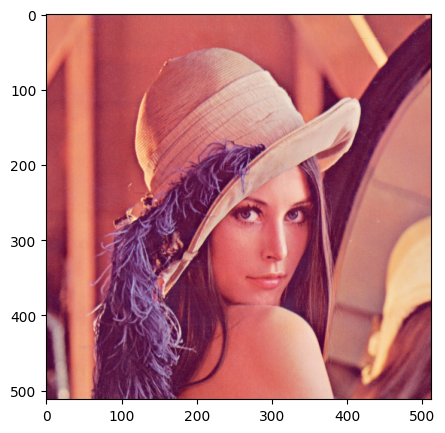

In [5]:
image = Image.open(f'{IMG}/lenna.png')
plot(image)

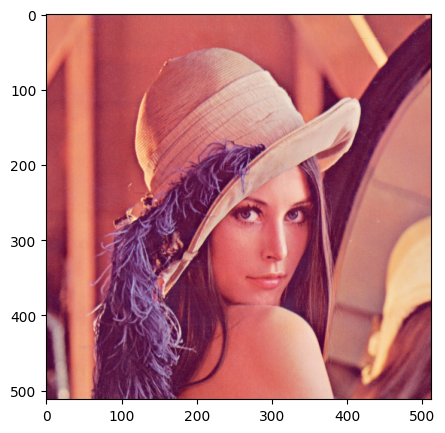

In [ ]:
img = cv2.imread(f'{IMG}/lenna.png')
plot_cv2(img)

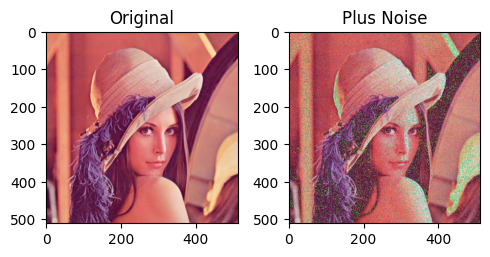

In [8]:
rows, cols = image.size
noise = np.random.normal(0, 20, (rows, cols, 3)).astype(np.uint8)
noisy_image = image + noise
noisy_image = Image.fromarray(noisy_image)
plot_image(image, noisy_image, title_2='Plus Noise')

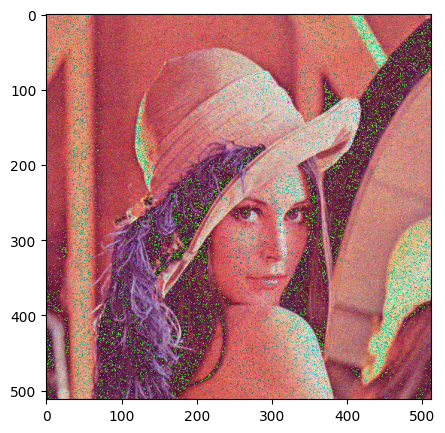

In [9]:
noisy_img = img + noise
plot_cv2(noisy_img)

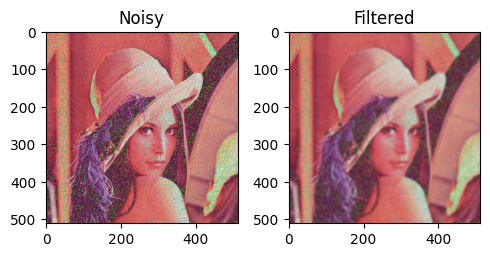

In [10]:
kernel = np.ones((5, 5)) / 36
kernel_filter = ImageFilter.Kernel((5, 5), kernel.flatten())
image_filtered = noisy_image.filter(kernel_filter).filter(kernel_filter)
plot_image(noisy_image, image_filtered, 'Noisy', 'Filtered')

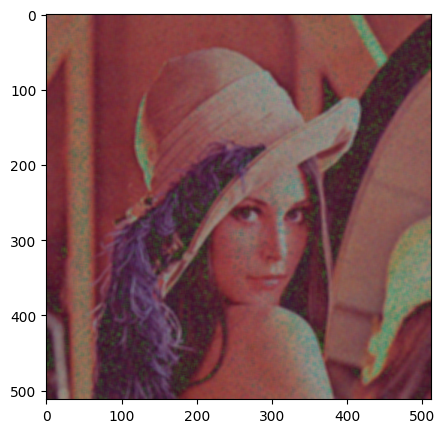

In [11]:
img_filtered = cv2.filter2D(src=noisy_img, ddepth=-1, kernel=kernel)
plot_cv2(img_filtered)

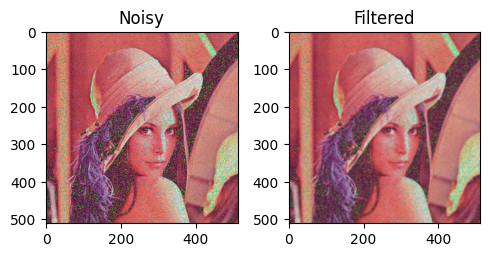

In [12]:
kernel = np.ones((3, 3)) / 36
kernel_filter = ImageFilter.Kernel((3, 3), kernel.flatten())
image_filtered = noisy_image.filter(kernel_filter).filter(kernel_filter)
plot_image(noisy_image, image_filtered, 'Noisy', 'Filtered')

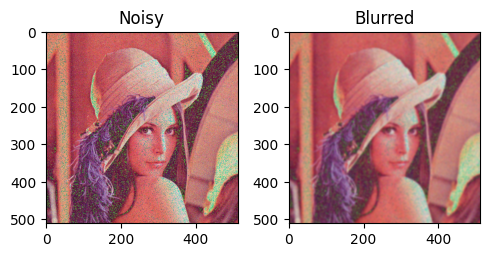

In [13]:
image_filtered = noisy_image.filter(ImageFilter.GaussianBlur) # 2x2
plot_image(noisy_image, image_filtered, 'Noisy', 'Blurred')

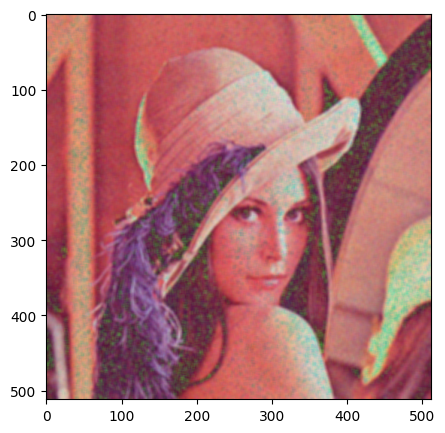

In [19]:
img_filtered = cv2.GaussianBlur(noisy_img, (5, 5), sigmaX=4, sigmaY=4)
plot_cv2(img_filtered)

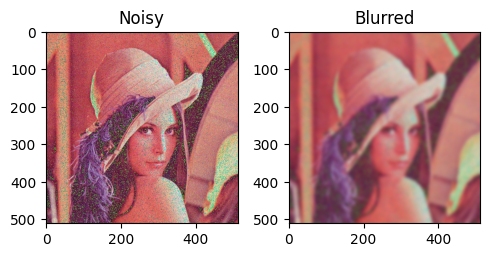

In [14]:
image_filtered = noisy_image.filter(ImageFilter.GaussianBlur(4))  # 4x4
plot_image(noisy_image, image_filtered, 'Noisy', 'Blurred')

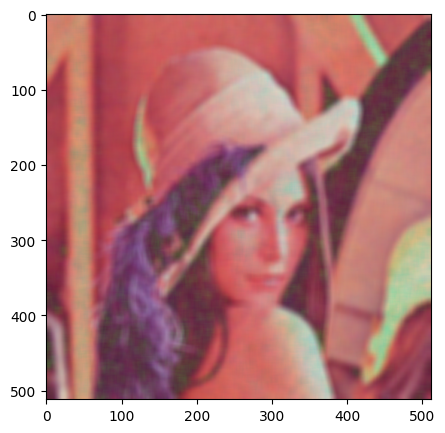

In [20]:
img_filtered = cv2.GaussianBlur(
    noisy_img, (11, 11), sigmaX=10, sigmaY=10)
plot_cv2(img_filtered)

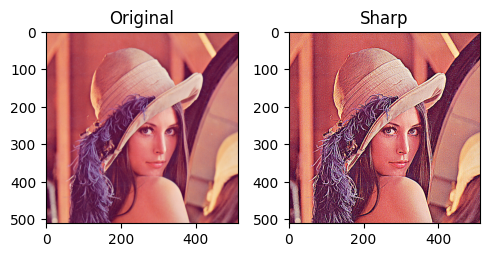

In [21]:
# Common Kernel for image sharpening
kernel = np.array(
    [[-1,-1,-1], 
    [-1, 9,-1],
    [-1,-1,-1]])
kernel = ImageFilter.Kernel((3, 3), kernel.flatten())
sharpened = image.filter(kernel)
plot_image(image, sharpened, 'Original', 'Sharp')

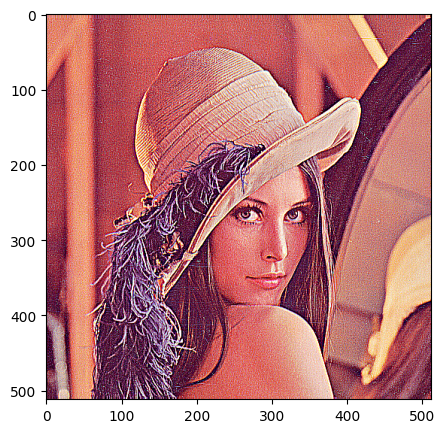

In [23]:
kernel = np.array(
    [[-1,-1,-1], 
    [-1, 9,-1],
    [-1,-1,-1]])
sharp_img = cv2.filter2D(img, -1, kernel)
plot_cv2(sharp_img)

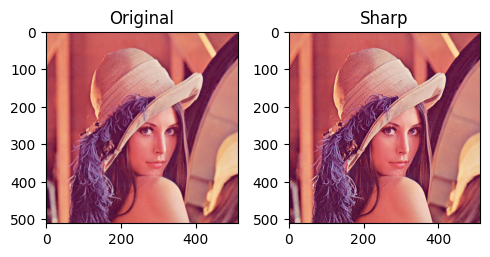

In [24]:
sharpened = image.filter(ImageFilter.SHARPEN)
plot_image(image, sharpened, title_2='Sharp')

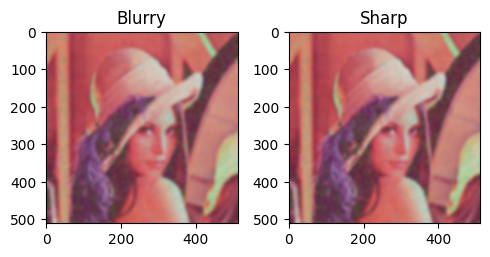

In [25]:
sharpened = image_filtered.filter(ImageFilter.SHARPEN)
plot_image(image_filtered, sharpened, 'Blurry', 'Sharp')

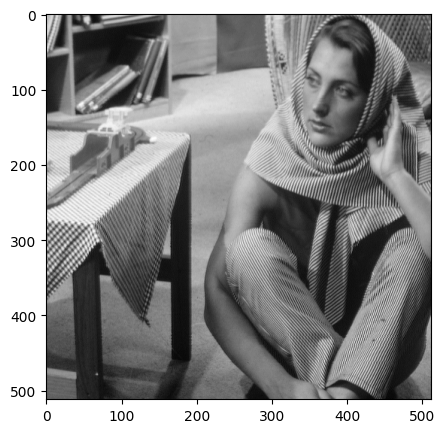

In [26]:
img_gray = Image.open(f'{IMG}/barbara.png')
plot(img_gray, cmap='gray')

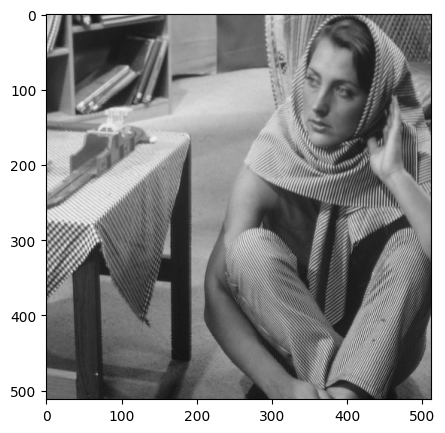

In [27]:
im_gray = cv2.imread(f'{IMG}/barbara.png', cv2.IMREAD_GRAYSCALE)
plot_cv2(im_gray)

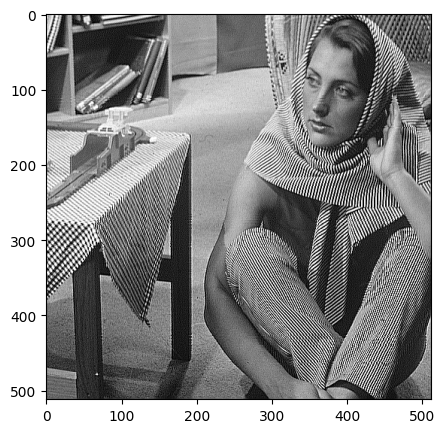

In [28]:
img_gray = img_gray.filter(ImageFilter.EDGE_ENHANCE)
plot(img_gray, cmap='gray')

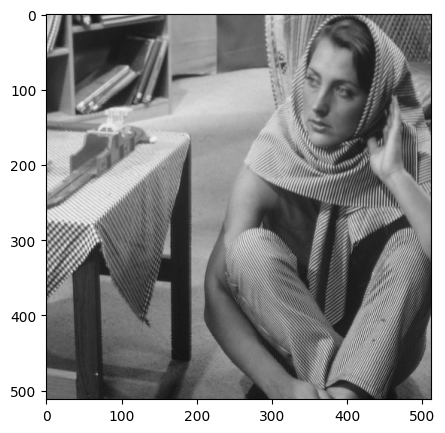

In [29]:
im_gray = cv2.GaussianBlur(im_gray, (3, 3), sigmaX=0.1, sigmaY=0.1)
plot_cv2(im_gray)

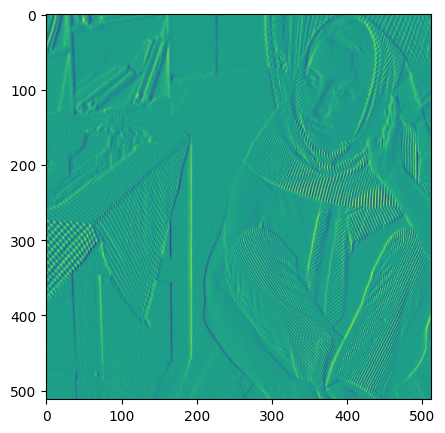

In [32]:
ddepth = cv2.CV_16S
# Applys the filter on the image in the X direction
grad_x = cv2.Sobel(src=im_gray, ddepth=ddepth, dx=1, dy=0, ksize=3)
plt.figure(figsize=(5, 5))
plt.imshow(grad_x);

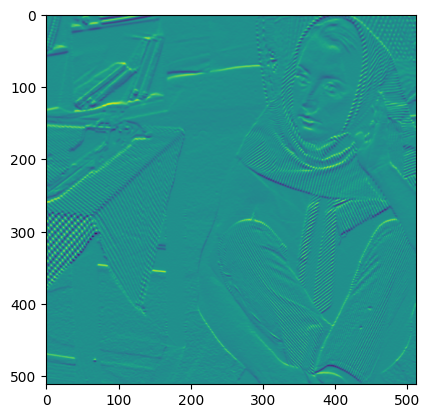

In [39]:
grad_y = cv2.Sobel(src=im_gray, ddepth=ddepth, dx=0, dy=1, ksize=3)
plt.imshow(grad_y);

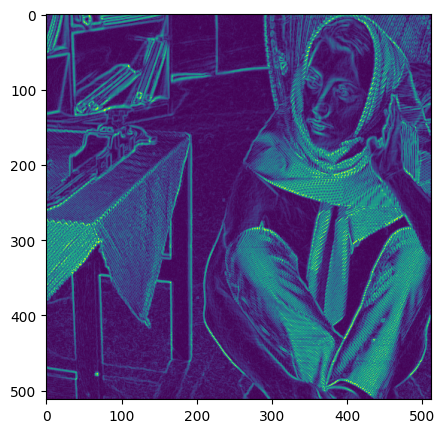

In [42]:
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
plt.figure(figsize=(5, 5))
plt.imshow(grad);

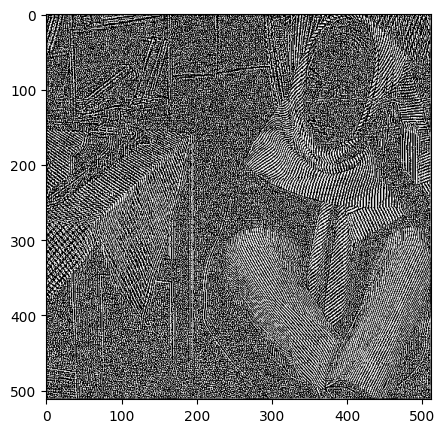

In [43]:
img_gray = img_gray.filter(ImageFilter.FIND_EDGES)
plot(img_gray, cmap='gray')

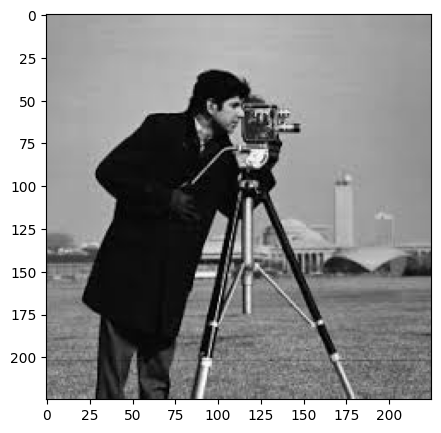

In [44]:
image = Image.open(f'{IMG}/cameraman.jpeg')
plot(image, cmap='gray')

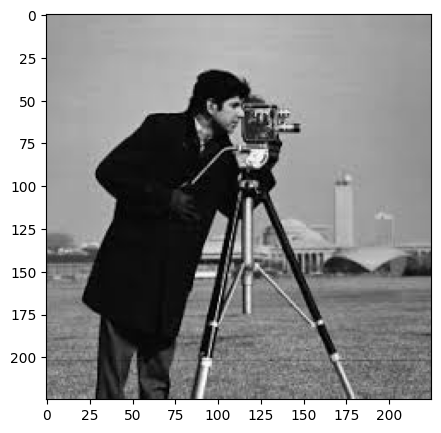

In [45]:
img = cv2.imread(f'{IMG}/cameraman.jpeg', cv2.IMREAD_GRAYSCALE)
plot_cv2(img)

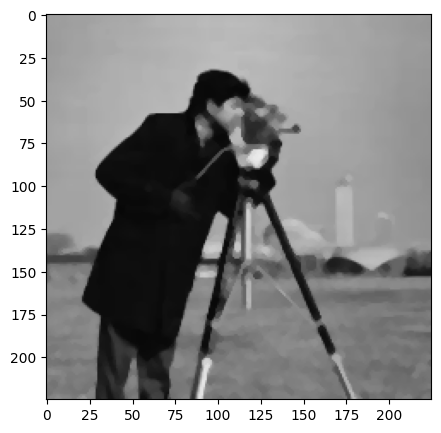

In [44]:
image = (
    image
    .filter(ImageFilter.MedianFilter)
    .filter(ImageFilter.MedianFilter)
    .filter(ImageFilter.MedianFilter))
plot(image, cmap='gray')

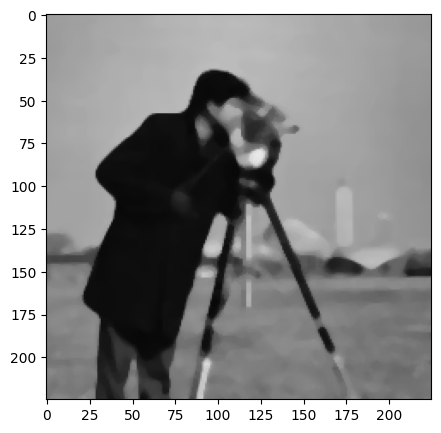

In [49]:
img = cv2.medianBlur(img, 5)
plot_cv2(img)

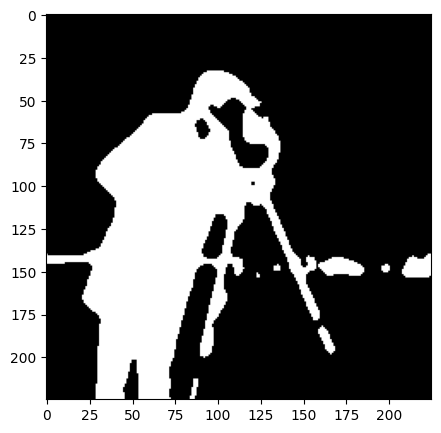

In [53]:
ret, outs = cv2.threshold(
    src=img,
    thresh=86,
    maxval=255,
    type=cv2.THRESH_OTSU +cv2.THRESH_BINARY_INV)
plot_cv2(outs)